---
### The data science methodology followed for this project has been outlined by John Rollins, IBM

- Business Understanding
- Analytical Approach
- Data requirements
- Data collection
- Data Understanding
- Data Preparation
- Modeling

## 1. Business Understanding
Customer segmentation is the practice of dividing a company's customers into groups that reflect similarity among customers in each group. The goal of this project is to divide customers into groups based on common characteristics in order to maximize the value of each customer to the business. 

## 2. Analytical Approach 
Clustering of Customers based on similar characteristics is an Unsupervised Learning as for each observation we do not have any target variable. 
For this project I will use two Machine Learning models
- I will use KMeans Clustering Algorithm which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean
- I will also use Hierarchical clustering which is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

## 3,4. Data Requirements and Data Collection
We would require a dataset which gives us information regarding customers from a market. For this project, the dataset has been provided to us on Kaggle. This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis

---

## Libraries Used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

## Import the dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 5. Data Understanding / Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
#number of missing values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

---
Dataset Understanding:
- There are total of 200 observations with each having 5 variables. 
- The column of the dataset include CustomerID, Gender, Age, Annual Income, Spending Score.
- There are no missing values (Good day for us XD)
- There is one categorical variable - Gender
---

In [6]:
# statistical information about the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# statistical information about the categorical variable
df.describe(include=['O']).T

,count,unique,top,freq
Genre,200,2,Female,112


In [8]:
# let's change the name of the columns to make it easier for analysis
df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Score", "Genre": "Gender"}, inplace=True)

## Visualisation

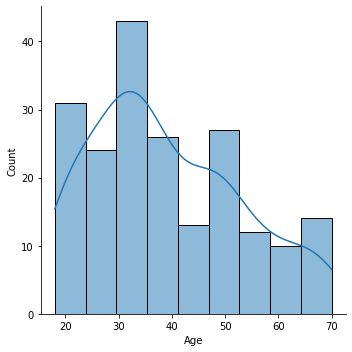

In [9]:
# distribution of age
sns.displot(x='Age', data=df, kde=True)

In [10]:
# unique values for spending score
df['Score'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

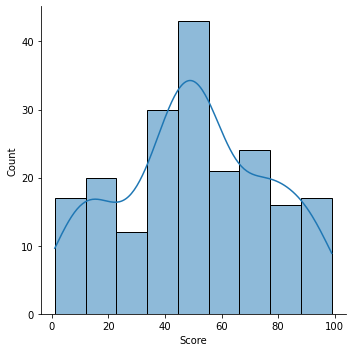

In [11]:
# distribution of spending score
sns.displot(x='Score', data=df, kde=True)

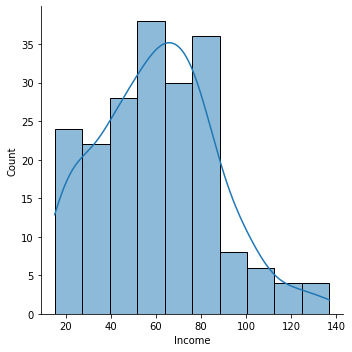

In [12]:
# distribution of annual income
sns.displot(x='Income', data=df, kde=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

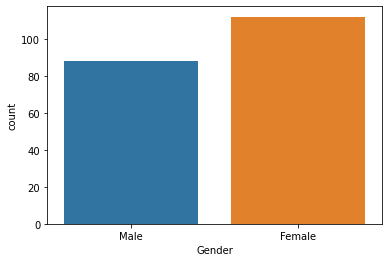

In [13]:
# distribution of categorical variable
sns.countplot(x='Gender', data=df)

In [14]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

## Correlation of the Data

<AxesSubplot:>

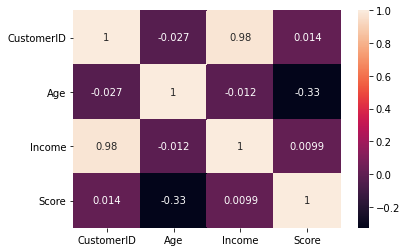

In [15]:
sns.heatmap(df.corr(), annot=True)

## 6. Data Cleaning

### Feature Engineering

In [16]:
# drop CustomerID as it is not useful
df.drop('CustomerID', axis=1, inplace=True)

In [17]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
df = pd.get_dummies(df).reset_index(drop=True)

In [19]:
df.head()

,Age,Income,Score,Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


## 7. Modeling

### K Means Clustering
In K-means, objects are assigned to a cluster based on the Euclidean distance between the object and the center of the cluster, also referred to as the cluster centroid.

But we do not know in advance how many clusters there are, and we do not know what the clusters will look like. That is why we work in two steps.
- First, we determine the optimal number of clusters, and then
- We determine starting values for each cluster.

In [20]:
X = df.iloc[:,].values

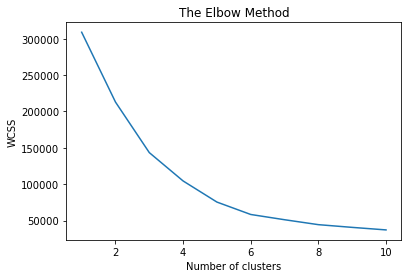

In [21]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5
                , init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

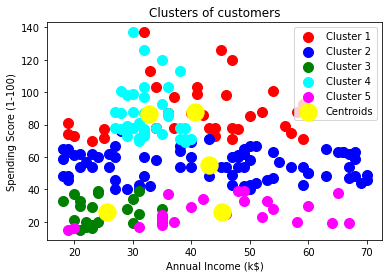

In [23]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

---

### Hierarchical clustering
Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

In [24]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

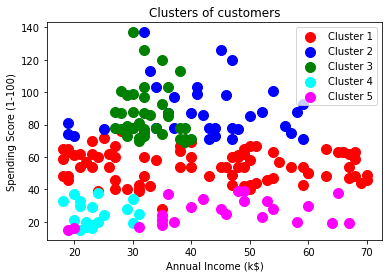

In [25]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()